
##1.   Name of Student:
##2.   Roll No:


# Assignment 9

# Apply KMeans clustering on sample data.Plot clusters. Evaluate with silhouette score.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.sample(5)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Genre', palette='Set1')
plt.title("Gender Distribution")
plt.show()

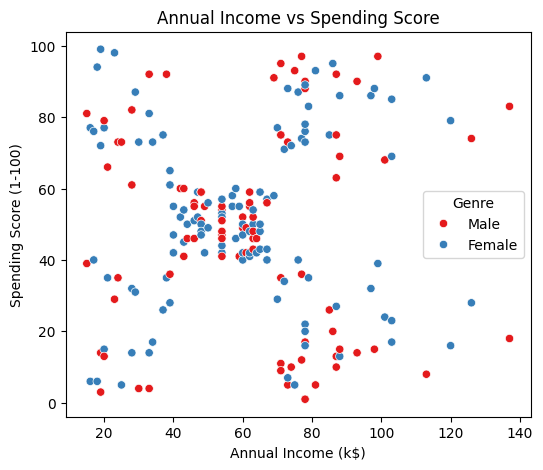

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', palette='Set1')
plt.title("Annual Income vs Spending Score")
plt.show()


In [ ]:
df

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [ ]:
X = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [ ]:
print("\nCluster Labels:\n", df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())


Cluster Labels:
    Genre  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0      1   19                  15                      39        2
1      1   21                  15                      81        2
2      0   20                  16                       6        0
3      0   23                  16                      77        2
4      0   31                  17                      40        0


In [ ]:
df['Cluster'].value_counts()

,count
Cluster,
0,89
3,38
4,33
2,29
1,11


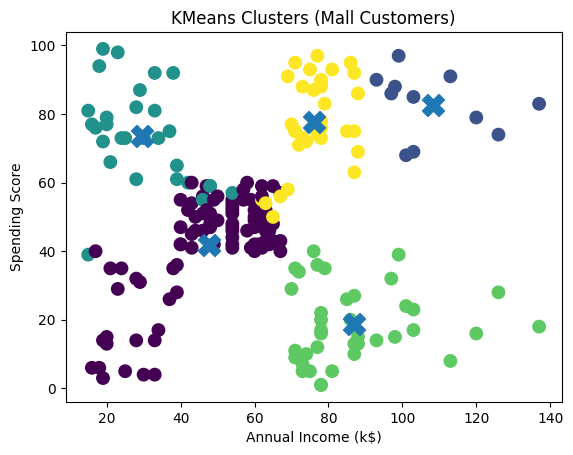

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], s=80)
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3],
            marker='X', s=250)
plt.title("KMeans Clusters (Mall Customers)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

In [ ]:
sil_score = silhouette_score(X, df['Cluster'])
print("\nSilhouette Score:", sil_score)


Silhouette Score: 0.3574050351346702
